In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
originData = pd.read_csv('data_o.csv')

In [3]:
originData.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339


(array([40574., 12250., 22219., 27470., 29369., 21219., 12537.,  4327.,
          638.,    50.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

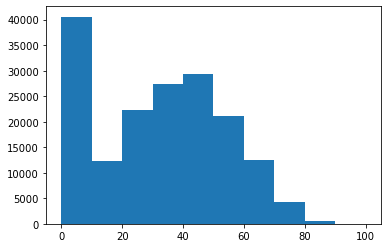

In [5]:
#popularity histogram
plt.hist(originData['popularity'])

In [6]:
#remove unnecessary columns -> data
data = originData.iloc[:,[0,2,3,4,6,9,10,11,12,13,14,15,17,18]]
data.head(3)

,valence,acousticness,artists,danceability,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,0.211,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,0.732,['Dennis Day'],0.819,0.341,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0.913,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339


In [7]:
#remove rows whose popularity < 5
popular_idx = data[data['popularity']<5].index
data = data.drop(popular_idx)

(array([11495., 13803., 25017., 26296., 27514., 17172., 10657.,  3068.,
          510.,    39.]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]),
 <BarContainer object of 10 artists>)

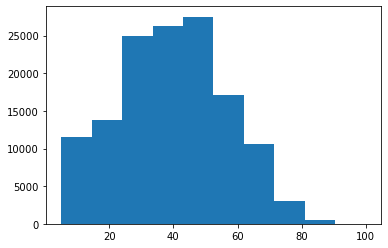

In [8]:
#popularity histogram
plt.hist(data['popularity'])

In [9]:
data.shape

(135571, 14)

In [10]:
major = data[data['mode']==1]
minor = data[data['mode']==0]
print(major.shape)
print(minor.shape)

(96126, 14)
(39445, 14)


In [11]:
#danceability
dance_min = data['danceability'].min()
dance_max = data['danceability'].max()
dance_mean = data['danceability'].mean()

#energy
energy_min = data['energy'].min()
energy_max = data['energy'].max()
energy_mean = data['energy'].mean()

#liveness
live_min = data['liveness'].min()
live_max = data['liveness'].max()
live_mean = data['liveness'].mean()

#loudness
loud_min = data['loudness'].min()
loud_max = data['loudness'].max()
loud_mean = data['loudness'].mean()

#speechiness
speech_min = data['speechiness'].min()
speech_max = data['speechiness'].max()
speech_mean = data['speechiness'].mean()

#tempo
tempo_min = data['tempo'].min()
tempo_max = data['tempo'].max()
tempo_mean = data['tempo'].mean()

#valence
valence_min = data['valence'].min()
valence_max = data['valence'].max()
valence_mean = data['valence'].mean()

#acoustic
acoustic_min = data['acousticness'].min()
acoustic_max = data['acousticness'].max()
acoustic_mean = data['acousticness'].mean()

#instrument
instru_min = data['instrumentalness'].min()
instru_max = data['instrumentalness'].max()
instru_mean = data['instrumentalness'].mean()

#popularity
popular_min = data['popularity'].min()
popular_max = data['popularity'].max()
popular_mean = data['popularity'].mean()

print("dance: {} {} {}".format(dance_min, dance_max, dance_mean))
print("energy:", energy_min, energy_max, energy_mean)
print("liveness:", live_min, live_max, live_mean)
print("loudness:", loud_min, loud_max, loud_mean)
print("speechiness:", speech_min, speech_max, speech_mean)
print("tempo:", tempo_min, tempo_max, tempo_mean)
print("valence:", valence_min, valence_max, valence_mean)
print("acoustic:", acoustic_min, acoustic_max, acoustic_mean)
print("instrumental", instru_min, instru_max, instru_mean)
print("popularity", popular_min, popular_max, popular_mean)

dance: 0.0 0.988 0.5462039329945332
energy: 0.0 1.0 0.5363639699146526
liveness: 0.0 1.0 0.20151996791348642
loudness: -60.0 3.744 -10.517958390806276
speechiness: 0.0 0.968 0.07618807488326955
tempo: 0.0 243.507 118.85225557825845
valence: 0.0 1.0 0.5345818492081691
acoustic: 0.0 0.996 0.41273869600187385
instrumental 0.0 1.0 0.12326688068561745
popularity 5 100 39.453356543803615


In [48]:
"""
dance, energy, liveness, speechiness, acoustic, instrumental -> 0-1
popularity 0-100
loudness, tempo
"""

'\ndance, energy, liveness, speechiness, acoustic, instrumental -> 0-1\npopularity 0-100\nloudness, tempo\n'

(array([6.0000e+00, 6.0000e+00, 3.7000e+01, 2.7600e+02, 9.5400e+02,
        3.5350e+03, 1.6159e+04, 5.3619e+04, 5.9695e+04, 1.2840e+03]),
 array([-60.    , -53.6256, -47.2512, -40.8768, -34.5024, -28.128 ,
        -21.7536, -15.3792,  -9.0048,  -2.6304,   3.744 ]),
 <BarContainer object of 10 artists>)

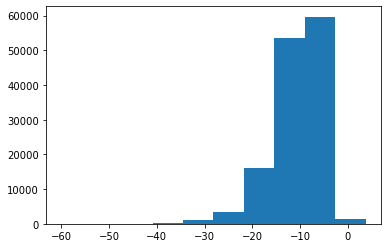

In [12]:
plt.hist(data['loudness'])

In [13]:
data[data['loudness']>0].shape

(22, 14)

In [14]:
# if loudness > 0 -> loudness to 0
data.loc[data.loudness > 0, 'loudness'] = 0

(array([6.0000e+00, 4.0000e+00, 2.4000e+01, 1.9700e+02, 6.4100e+02,
        2.1280e+03, 8.2990e+03, 3.3507e+04, 6.3869e+04, 2.6896e+04]),
 array([-60., -54., -48., -42., -36., -30., -24., -18., -12.,  -6.,   0.]),
 <BarContainer object of 10 artists>)

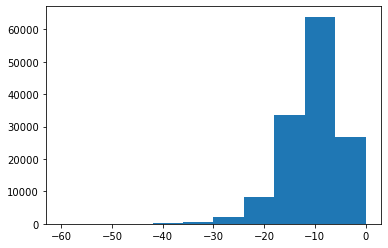

In [15]:
plt.hist(data['loudness'])

In [16]:
data['loudness'] = (data['loudness'] + 60) / 100

In [17]:
loud_min = data['loudness'].min()
loud_max = data['loudness'].max()
loud_mean = data['loudness'].mean()
print("loudness:", loud_min, loud_max, loud_mean)

loudness: 0.0 0.6 0.4948191181742411


(array([1.0100e+02, 8.1000e+01, 3.8560e+03, 3.3250e+04, 3.9647e+04,
        3.4653e+04, 1.4378e+04, 8.0650e+03, 1.5310e+03, 9.0000e+00]),
 array([0.      , 0.405845, 0.81169 , 1.217535, 1.62338 , 2.029225,
        2.43507 , 2.840915, 3.24676 , 3.652605, 4.05845 ]),
 <BarContainer object of 10 artists>)

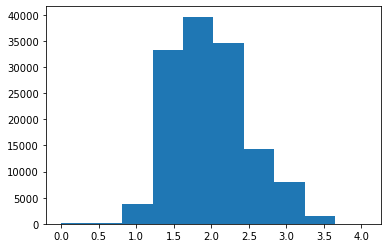

In [18]:
plt.hist(data['tempo']/60)

(array([1.0100e+02, 8.1000e+01, 3.8560e+03, 3.3250e+04, 3.9647e+04,
        3.4653e+04, 1.4378e+04, 8.0650e+03, 1.5310e+03, 9.0000e+00]),
 array([0.        , 0.10146125, 0.2029225 , 0.30438375, 0.405845  ,
        0.50730625, 0.6087675 , 0.71022875, 0.81169   , 0.91315125,
        1.0146125 ]),
 <BarContainer object of 10 artists>)

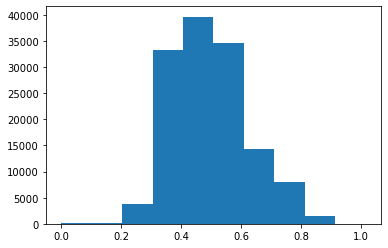

In [19]:
plt.hist(data['tempo']/240)

In [20]:
data['tempo'] = data['tempo']/240

In [21]:
tempo_min = data['tempo'].min()
tempo_max = data['tempo'].max()
tempo_mean = data['tempo'].mean()
print("tempo:", tempo_min, tempo_max, tempo_mean)

tempo: 0.0 1.0146125 0.49521773157607013


In [22]:
data.loc[data.tempo > 1, 'tempo'] = 1

In [23]:
tempo_min = data['tempo'].min()
tempo_max = data['tempo'].max()
tempo_mean = data['tempo'].mean()
print("tempo:", tempo_min, tempo_max, tempo_mean)

tempo: 0.0 1.0 0.49521752015548604


In [24]:
meanSum = dance_mean + energy_mean + live_mean + loud_mean + speech_mean + tempo_mean
dance_percent = dance_mean / meanSum
energy_percent = energy_mean / meanSum
live_percent = live_mean / meanSum
loud_percent = loud_mean / meanSum
speech_percent = speech_mean / meanSum
tempo_percent = tempo_mean / meanSum

print(meanSum)
print(meanSum/6)
print(dance_percent, energy_percent, live_percent, loud_percent, speech_percent, tempo_percent)

2.350312584035669
0.3917187640059448
0.23239629345670212 0.2282096320114468 0.08574177293790472 0.21053332290150034 0.032416145580282225 0.2107028331121638


In [25]:
data['percentage'] = (data['danceability'] + data['energy'] + data['liveness'] +
                      data['loudness'] + data['speechiness'] + data['tempo']) / 6

In [26]:
data.head(3)

,valence,acousticness,artists,danceability,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,percentage
1,0.9630,0.732,['Dennis Day'],0.819,0.341,0.000,7,0.160,0.47559,1,Clancy Lowered the Boom,5,0.4150,0.253900,0.410748
2,0.0394,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0.913,3,0.101,0.45150,1,Gati Bali,5,0.0339,0.459746,0.256691
5,0.1960,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,0.346,0.168,2,0.130,0.47494,1,Gati Mardika,6,0.0700,0.499267,0.369534


In [27]:
percentage_min = data['percentage'].min()
percentage_max = data['percentage'].max()
percentage_mean = data['percentage'].mean()
print("percentage:", percentage_min, percentage_max, percentage_mean)

percentage: 0.0 0.7471270833333333 0.3917187640059432


(array([2.0000e+01, 2.5500e+02, 3.8750e+03, 1.4949e+04, 3.2899e+04,
        4.9313e+04, 2.8558e+04, 5.0110e+03, 6.3600e+02, 5.5000e+01]),
 array([0.        , 0.07471271, 0.14942542, 0.22413813, 0.29885083,
        0.37356354, 0.44827625, 0.52298896, 0.59770167, 0.67241438,
        0.74712708]),
 <BarContainer object of 10 artists>)

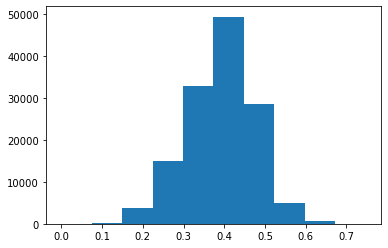

In [28]:
plt.hist(data['percentage'])

In [29]:
data['mode2'] = np.where(data['mode'] == 1, 0.25, 0)

In [30]:
data.head(3)

,valence,acousticness,artists,danceability,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,percentage,mode2
1,0.9630,0.732,['Dennis Day'],0.819,0.341,0.000,7,0.160,0.47559,1,Clancy Lowered the Boom,5,0.4150,0.253900,0.410748,0.25
2,0.0394,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0.913,3,0.101,0.45150,1,Gati Bali,5,0.0339,0.459746,0.256691,0.25
5,0.1960,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,0.346,0.168,2,0.130,0.47494,1,Gati Mardika,6,0.0700,0.499267,0.369534,0.25


In [31]:
data['percentage'] = data['percentage'] + data['mode2']

In [32]:
percentage_min = data['percentage'].min()
percentage_max = data['percentage'].max()
percentage_mean = data['percentage'].mean()
print("percentage:", percentage_min, percentage_max, percentage_mean)

percentage: 0.0 0.9971270833333333 0.5689801252115182


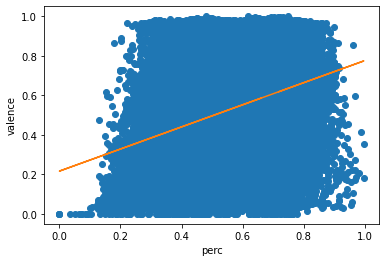

In [33]:
x = data['percentage']
y = data['valence']
#plt.plot(x, y, 'o')
line = LinearRegression()
line.fit(x.values.reshape(-1,1),y)
plt.plot(x,y,'o')
plt.plot(x, line.predict(x.values.reshape(-1,1)))
plt.xlabel('perc')
plt.ylabel('valence')
plt.show()

In [36]:
example = data.iloc[123456]
example

valence                          0.532
acousticness                     0.921
artists             ['Oscar Peterson']
danceability                     0.565
energy                           0.209
instrumentalness                 0.823
key                                  0
liveness                         0.105
loudness                       0.39142
mode                                 1
name                           Carioca
popularity                          10
speechiness                     0.0478
tempo                         0.395858
percentage                     0.53568
mode2                             0.25
Name: 158528, dtype: object

In [35]:
example = data.iloc[54321]
example

valence                           0.556
acousticness                      0.111
artists             ['The Temptations']
danceability                      0.626
energy                            0.611
instrumentalness                    0.0
key                                   6
liveness                          0.377
loudness                        0.52125
mode                                  0
name                 This Is My Promise
popularity                           41
speechiness                       0.075
tempo                            0.5752
percentage                     0.464242
mode2                               0.0
Name: 70806, dtype: object

In [37]:
example = data.iloc[7777]
example

valence                                    0.811
acousticness                             0.00591
artists                               ['Eagles']
danceability                               0.465
energy                                     0.812
instrumentalness                        0.000494
key                                            7
liveness                                   0.408
loudness                                 0.53602
mode                                           1
name                Already Gone - 2013 Remaster
popularity                                    57
speechiness                               0.0467
tempo                                   0.609167
percentage                              0.729481
mode2                                       0.25
Name: 10444, dtype: object

In [38]:
targetData = data.loc[:,['name','artists','percentage',
                         'danceability','energy','liveness','loudness','speechiness','tempo','mode2',
                         'acousticness','instrumentalness']]

In [39]:
targetData.head(3)

,name,artists,percentage,danceability,energy,liveness,loudness,speechiness,tempo,mode2,acousticness,instrumentalness
1,Clancy Lowered the Boom,['Dennis Day'],0.660748,0.819,0.341,0.160,0.47559,0.4150,0.253900,0.25,0.732,0.000
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.506691,0.328,0.166,0.101,0.45150,0.0339,0.459746,0.25,0.961,0.913
5,Gati Mardika,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.619534,0.697,0.346,0.130,0.47494,0.0700,0.499267,0.25,0.579,0.168


In [40]:
targetData.shape

(135571, 12)

In [44]:
refinedTarget = targetData.drop_duplicates()

In [45]:
refinedTarget.shape

(133128, 12)

In [49]:
refinedTarget = refinedTarget.drop_duplicates(['artists','percentage','danceability','energy','liveness',
                                              'loudness','speechiness','tempo','mode2',
                                               'acousticness','instrumentalness'])

In [50]:
refinedTarget.shape

(133051, 12)

In [51]:
#targetData.to_csv('spotifyTarget.csv', encoding='utf-8-sig', index=False)
refinedTarget.to_csv('spotifyRefinedTarget.csv', encoding='utf-8-sig', index=False)